<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RS_gr2/blob/main/Fedoseev%20Sergey/%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%9F%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3_19_07_26_07_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование датасета

In [ ]:
# Импорт библиотеки для работы с массивами данных
import numpy as np

# Импорт библиотеки для работы с таблицами
import pandas as pd

# Импорт библиотеки для работы с графиками
import matplotlib.pyplot as plt

# Загрузка файла из облака в colab https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%92%D0%B5%D1%81%D1%8C%20%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4.csv
import gdown
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%92%D0%B5%D1%81%D1%8C%20%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4.csv', None, quiet=True)


'%D0%92%D0%B5%D1%81%D1%8C%20%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4.csv'

In [ ]:
# Работа с массивами данных
import numpy as np

# Работа с табличными данными
import pandas as pd

# Перемешивание данных
from sklearn.utils import shuffle

import string

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразования текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

# Загрузка датасетов из облака google
import gdown

# Регулярные выражения
import re

# Случайные числа
import random

# Работа с файлами
import os

# Отрисовка графиков
import matplotlib.pyplot as plt

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split

!pip install tensorflow-addons

import tensorflow_addons as tfa

from tensorflow_addons.metrics import F1Score

%matplotlib inline
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%92%D0%B5%D1%81%D1%8C%20%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4.csv', None, quiet=True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 4.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


'%D0%92%D0%B5%D1%81%D1%8C%20%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4.csv'

In [ ]:
# Переименование файла
import os

# Предположим, что файл загружен с именем "old_filename.txt"
old_filename = "%D0%92%D0%B5%D1%81%D1%8C%20%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4.csv"

# Получение нового имени файла
new_filename = "profpatolog.csv"

# Переименование файла
os.rename(old_filename, new_filename)


In [ ]:
# Создадаем переменную data, в которую с помощью функции pd.read_csv() загружаем данные из файла
data = pd.read_csv('profpatolog.csv', delimiter=';', quotechar='"')
# Вывод датасета на экран
data

<ipython-input-3-8320353240b5>:2: DtypeWarning: Columns (16,18,19,20,22,23,25,26,27,29,30,32,35,36,37,39,40,41,42,43,44,46,47,49,50,52,53,54,55,56,57,58,59,60,61,62,63,64,66,68,70,74,75,77,78,80,81,82,84,85,87,90,91,92,95,96,97,99,100,101,103,104,108,109,114,115,116,120,122,123,124,126,127,128,130,131,133,138,139,142,143,145,146,148,149,153,154,155,157,158,160,161,162,164,165,167,168,170,171,173,175,176,177,178,179,180,181,182,183,184,188,189,191,192,194,195,196,201,202,204,208,209,210,211,214,215,216,217,218,220,221,222,224,225,228,229,230,231,233,234,235,236,240,241,242,243,244,245,246,247,248,250,258,260,262,265,266,269,270,272,273,274,276,277,278,280,281,282,283,284,285,286,287,288) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('profpatolog.csv', delimiter=';', quotechar='"')


,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,ХирургНеИсп3_Диагноз_ЗначениеПредставлениеПредставление,ХирургНеИсп3_МКБ101,ХирургНеИсп3_МКБ102,ХирургНеИсп3_МКБ103,ЭКГНеИсп1_МКБ101,ЭКГНеИсп1_МКБ102,ЭКГНеИсп2_МКБ101,ЭКГНеИсп2_МКБ102,Эндоскопия1_МКБ101,Эндоскопия1_МКБ102
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,1989-12-31T00:00:00,Женский,Женский,2021-02-02T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,1998-07-20T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,2002-01-04T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,941e4b56-9c2d-11eb-80eb-0cc47aab8067,7ea364a1-9c2d-11eb-80eb-0cc47aab8067,1991-08-26T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5a24806c-f033-11eb-80f6-0cc47aab8067,52eb6a7d-c1ab-11ea-80dd-0cc47aab8067,1999-03-21T00:00:00,Женский,Женский,2021-07-29T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,0dc1a36a-0e78-11ee-8133-0cc47aab8067,c31ae865-e5bb-11ed-812b-0cc47aab8067,1971-06-04T00:00:00,Мужской,Мужской,2023-06-19T00:00:00,Периодический,Периодический,False,2e01d3ec-615e-11eb-80e7-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32682,43a376cb-0e53-11ee-8133-0cc47aab8067,71fb1a04-28f6-11e7-80d5-708bcd7f83cd,1978-12-12T00:00:00,Мужской,Мужской,2023-06-19T00:00:00,Периодический,Периодический,False,e935abf8-4ed4-11e9-80ce-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32683,f2163f48-0e61-11ee-8133-0cc47aab8067,c5c58eaf-cb1b-11ea-80e0-0cc47aab8067,1995-01-27T00:00:00,Женский,Женский,2023-06-19T00:00:00,Периодический,Периодический,False,250639b6-68c4-11e8-80ce-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32684,346a9c13-0e65-11ee-8133-0cc47aab8067,d942cc21-e669-11ec-8102-0cc47aab8067,1975-02-18T00:00:00,Мужской,Мужской,2023-06-19T00:00:00,Периодический,Периодический,False,c9d539ae-91a3-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Создание копии датасета
data_backup = data.copy()
# Вывод на экран первых и последних пяти строк
data.head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,ХирургНеИсп3_Диагноз_ЗначениеПредставлениеПредставление,ХирургНеИсп3_МКБ101,ХирургНеИсп3_МКБ102,ХирургНеИсп3_МКБ103,ЭКГНеИсп1_МКБ101,ЭКГНеИсп1_МКБ102,ЭКГНеИсп2_МКБ101,ЭКГНеИсп2_МКБ102,Эндоскопия1_МКБ101,Эндоскопия1_МКБ102
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,1989-12-31T00:00:00,Женский,Женский,2021-02-02T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,1998-07-20T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,2002-01-04T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,941e4b56-9c2d-11eb-80eb-0cc47aab8067,7ea364a1-9c2d-11eb-80eb-0cc47aab8067,1991-08-26T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5a24806c-f033-11eb-80f6-0cc47aab8067,52eb6a7d-c1ab-11ea-80dd-0cc47aab8067,1999-03-21T00:00:00,Женский,Женский,2021-07-29T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.tail()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,ХирургНеИсп3_Диагноз_ЗначениеПредставлениеПредставление,ХирургНеИсп3_МКБ101,ХирургНеИсп3_МКБ102,ХирургНеИсп3_МКБ103,ЭКГНеИсп1_МКБ101,ЭКГНеИсп1_МКБ102,ЭКГНеИсп2_МКБ101,ЭКГНеИсп2_МКБ102,Эндоскопия1_МКБ101,Эндоскопия1_МКБ102
32681,0dc1a36a-0e78-11ee-8133-0cc47aab8067,c31ae865-e5bb-11ed-812b-0cc47aab8067,1971-06-04T00:00:00,Мужской,Мужской,2023-06-19T00:00:00,Периодический,Периодический,False,2e01d3ec-615e-11eb-80e7-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32682,43a376cb-0e53-11ee-8133-0cc47aab8067,71fb1a04-28f6-11e7-80d5-708bcd7f83cd,1978-12-12T00:00:00,Мужской,Мужской,2023-06-19T00:00:00,Периодический,Периодический,False,e935abf8-4ed4-11e9-80ce-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32683,f2163f48-0e61-11ee-8133-0cc47aab8067,c5c58eaf-cb1b-11ea-80e0-0cc47aab8067,1995-01-27T00:00:00,Женский,Женский,2023-06-19T00:00:00,Периодический,Периодический,False,250639b6-68c4-11e8-80ce-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32684,346a9c13-0e65-11ee-8133-0cc47aab8067,d942cc21-e669-11ec-8102-0cc47aab8067,1975-02-18T00:00:00,Мужской,Мужской,2023-06-19T00:00:00,Периодический,Периодический,False,c9d539ae-91a3-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32685,7d5dfbf5-0e65-11ee-8133-0cc47aab8067,2f37b8d3-e669-11ec-8102-0cc47aab8067,1978-04-29T00:00:00,Мужской,Мужской,2023-06-19T00:00:00,Периодический,Периодический,False,c9d539ae-91a3-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Восстановление датасета
data = data_backup.copy()
data.head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,ХирургНеИсп3_Диагноз_ЗначениеПредставлениеПредставление,ХирургНеИсп3_МКБ101,ХирургНеИсп3_МКБ102,ХирургНеИсп3_МКБ103,ЭКГНеИсп1_МКБ101,ЭКГНеИсп1_МКБ102,ЭКГНеИсп2_МКБ101,ЭКГНеИсп2_МКБ102,Эндоскопия1_МКБ101,Эндоскопия1_МКБ102
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,1989-12-31T00:00:00,Женский,Женский,2021-02-02T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,1998-07-20T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,2002-01-04T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,941e4b56-9c2d-11eb-80eb-0cc47aab8067,7ea364a1-9c2d-11eb-80eb-0cc47aab8067,1991-08-26T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5a24806c-f033-11eb-80f6-0cc47aab8067,52eb6a7d-c1ab-11ea-80dd-0cc47aab8067,1999-03-21T00:00:00,Женский,Женский,2021-07-29T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Анализ датасета
data.shape

(32686, 289)

In [ ]:
data.size

9446254

In [ ]:
data.count

<bound method DataFrame.count of               ДокументПрохождениеМедосмотра  \
0      79292387-652a-11eb-80e7-0cc47aab8067   
1      78efe744-9c36-11eb-80eb-0cc47aab8067   
2      131f68ef-9c2d-11eb-80eb-0cc47aab8067   
3      941e4b56-9c2d-11eb-80eb-0cc47aab8067   
4      5a24806c-f033-11eb-80f6-0cc47aab8067   
...                                     ...   
32681  0dc1a36a-0e78-11ee-8133-0cc47aab8067   
32682  43a376cb-0e53-11ee-8133-0cc47aab8067   
32683  f2163f48-0e61-11ee-8133-0cc47aab8067   
32684  346a9c13-0e65-11ee-8133-0cc47aab8067   
32685  7d5dfbf5-0e65-11ee-8133-0cc47aab8067   

                                     Клиент   КлиентДатаРождения КлиентПол  \
0      dca98d4e-2098-11ea-80d6-0cc47aab8067  1989-12-31T00:00:00   Женский   
1      b35fb2bb-9c35-11eb-80eb-0cc47aab8067  1998-07-20T00:00:00   Женский   
2      f8c98e39-9c2c-11eb-80eb-0cc47aab8067  2002-01-04T00:00:00   Женский   
3      7ea364a1-9c2d-11eb-80eb-0cc47aab8067  1991-08-26T00:00:00   Женский   
4      52eb6

In [ ]:
data.info

<bound method DataFrame.info of               ДокументПрохождениеМедосмотра  \
0      79292387-652a-11eb-80e7-0cc47aab8067   
1      78efe744-9c36-11eb-80eb-0cc47aab8067   
2      131f68ef-9c2d-11eb-80eb-0cc47aab8067   
3      941e4b56-9c2d-11eb-80eb-0cc47aab8067   
4      5a24806c-f033-11eb-80f6-0cc47aab8067   
...                                     ...   
32681  0dc1a36a-0e78-11ee-8133-0cc47aab8067   
32682  43a376cb-0e53-11ee-8133-0cc47aab8067   
32683  f2163f48-0e61-11ee-8133-0cc47aab8067   
32684  346a9c13-0e65-11ee-8133-0cc47aab8067   
32685  7d5dfbf5-0e65-11ee-8133-0cc47aab8067   

                                     Клиент   КлиентДатаРождения КлиентПол  \
0      dca98d4e-2098-11ea-80d6-0cc47aab8067  1989-12-31T00:00:00   Женский   
1      b35fb2bb-9c35-11eb-80eb-0cc47aab8067  1998-07-20T00:00:00   Женский   
2      f8c98e39-9c2c-11eb-80eb-0cc47aab8067  2002-01-04T00:00:00   Женский   
3      7ea364a1-9c2d-11eb-80eb-0cc47aab8067  1991-08-26T00:00:00   Женский   
4      52eb6a

In [ ]:
# Количетво пустых ячеек
data.isna().sum()

ДокументПрохождениеМедосмотра        0
Клиент                               0
КлиентДатаРождения                 239
КлиентПол                            4
КлиентПолПредставление               4
                                 ...  
ЭКГНеИсп1_МКБ102                 32664
ЭКГНеИсп2_МКБ101                 32664
ЭКГНеИсп2_МКБ102                 32664
Эндоскопия1_МКБ101               32592
Эндоскопия1_МКБ102               32680
Length: 289, dtype: int64

In [ ]:
# Доля пропусков от общего количества элементов
data.isna().sum() / data.shape[0]

ДокументПрохождениеМедосмотра    0.000000
Клиент                           0.000000
КлиентДатаРождения               0.007312
КлиентПол                        0.000122
КлиентПолПредставление           0.000122
                                   ...   
ЭКГНеИсп1_МКБ102                 0.999327
ЭКГНеИсп2_МКБ101                 0.999327
ЭКГНеИсп2_МКБ102                 0.999327
Эндоскопия1_МКБ101               0.997124
Эндоскопия1_МКБ102               0.999816
Length: 289, dtype: float64

In [ ]:
# Общее количество пропусков
data.isna().sum().sum()

8791393

# Подготовка данных

In [ ]:
# Удаление столбцов, в которых все значения являются пустыми
data_new_colums = data.dropna(axis=1, how='all')

# Удаление строк, в которых все значения являются пустыми
data_new = data_new_colums.dropna(axis=0, how='all')


In [ ]:
# Удаление полностью дублирующихся столбцов
data_fin = data_new.T.drop_duplicates().T

# Вывод обновленного датафрейма
data_fin


,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ПсихОсвидетельствование,Контрагент,Цех,...,Хирургия3_МКБ101,Хирургия3_МКБ102,ХирургНеИсп1_МКБ101,ХирургНеИсп1_МКБ102,ХирургНеИсп1_МКБ103,ХирургНеИсп2_МКБ101,ЭКГНеИсп1_МКБ101,ЭКГНеИсп1_МКБ102,Эндоскопия1_МКБ101,Эндоскопия1_МКБ102
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,1989-12-31T00:00:00,Женский,Женский,2021-02-02T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,1998-07-20T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,2002-01-04T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,941e4b56-9c2d-11eb-80eb-0cc47aab8067,7ea364a1-9c2d-11eb-80eb-0cc47aab8067,1991-08-26T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5a24806c-f033-11eb-80f6-0cc47aab8067,52eb6a7d-c1ab-11ea-80dd-0cc47aab8067,1999-03-21T00:00:00,Женский,Женский,2021-07-29T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,0dc1a36a-0e78-11ee-8133-0cc47aab8067,c31ae865-e5bb-11ed-812b-0cc47aab8067,1971-06-04T00:00:00,Мужской,Мужской,2023-06-19T00:00:00,Периодический,False,2e01d3ec-615e-11eb-80e7-0cc47aab8067,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32682,43a376cb-0e53-11ee-8133-0cc47aab8067,71fb1a04-28f6-11e7-80d5-708bcd7f83cd,1978-12-12T00:00:00,Мужской,Мужской,2023-06-19T00:00:00,Периодический,False,e935abf8-4ed4-11e9-80ce-0cc47aab8067,Без отдела,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32683,f2163f48-0e61-11ee-8133-0cc47aab8067,c5c58eaf-cb1b-11ea-80e0-0cc47aab8067,1995-01-27T00:00:00,Женский,Женский,2023-06-19T00:00:00,Периодический,False,250639b6-68c4-11e8-80ce-0cc47aab8067,Без отдела,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32684,346a9c13-0e65-11ee-8133-0cc47aab8067,d942cc21-e669-11ec-8102-0cc47aab8067,1975-02-18T00:00:00,Мужской,Мужской,2023-06-19T00:00:00,Периодический,False,c9d539ae-91a3-11e9-80cf-0cc47aab8067,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Удаляем (возможно, временно) строки с пустыми значениями в колонке "ЗаключениеМК"
data_new = data_fin.dropna(subset=['ЗаключениеМК'], inplace=True)

In [ ]:
# Размер нового датасета
data_fin.shape
# Количество строк изменилось

(19205, 150)

In [ ]:
# Получение сведений о данных в колонке "ЗаключениеМК"
data_fin['ЗаключениеМК'].value_counts()

Годен                               17982
ГоденСКоррекциейЗрения               1114
ГоденБезРаботНаВысотах                 52
НуждаетсяВДообследованииИЛечении       40
ГоденСКоррекциейСлуха                   5
ОграниченноГоден                        4
Негоден                                 3
Газоспасатель                           2
 п. 11.3                                1
машинист бульдозера                     1
 Газоспасатель                          1
Name: ЗаключениеМК, dtype: int64

In [ ]:
# Удаляем лишние данные: 'машинист бульдозера', 'Газоспасатель', ' Газоспасатель', ' п. 11.3'
# ВНИМАНИЕ! Почему-то корректно удаление происходит со второго раза!
data_fin = data_fin[~data_fin['ЗаключениеМК'].isin(['машинист бульдозера', 'Газоспасатель', ' Газоспасатель', ' п. 11.3'])]

# Приводим оставшиеся к 3 значениям: Годен, Годен с ограничениями, Негоден.
data_fin['ЗаключениеМК'] = data_fin['ЗаключениеМК'].replace({
    'ГоденСКоррекциейЗрения': 'Годен с ограничениями',
    'ГоденСКоррекциейСлуха': 'Годен с ограничениями',
    'ОграниченноГоден': 'Годен с ограничениями',
    'ГоденБезРаботНаВысотах': 'Годен с ограничениями',
    'ВременноНегоден': 'Негоден',
    'НуждаетсяВДообследованииИЛечении': 'Негоден'
})
data_fin['ЗаключениеМК'].value_counts()


<ipython-input-19-b9d0c67d29ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fin['ЗаключениеМК'] = data_fin['ЗаключениеМК'].replace({


Годен                    17982
Годен с ограничениями     1175
Негоден                     43
Name: ЗаключениеМК, dtype: int64

In [ ]:
# Избавляемся от GUIGов:
import re
import pandas as pd


df = pd.DataFrame(data_fin)

# Функция для удаления столбцов с GUID
def remove_guid_columns(df):
    # Паттерн для сопоставления GUID
    regex_GUID = r"\b[A-Fa-f0-9]{8}(?:-[A-Fa-f0-9]{4}){3}-[A-Fa-f0-9]{12}\b"

    # Поиск и удаление столбцов с GUID
    columns_to_remove = []
    for column in df.columns:
        if re.search(regex_GUID, str(df[column])):
            columns_to_remove.append(column)

    df = df.drop(columns=columns_to_remove)
    return df

# Удаление столбцов с GUID
df_guid = remove_guid_columns(df)


df_guid

,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ПсихОсвидетельствование,Цех,Профессия,ЗаключениеМК,ЗаключениеМКПредставление,...,Хирургия3_МКБ101,Хирургия3_МКБ102,ХирургНеИсп1_МКБ101,ХирургНеИсп1_МКБ102,ХирургНеИсп1_МКБ103,ХирургНеИсп2_МКБ101,ЭКГНеИсп1_МКБ101,ЭКГНеИсп1_МКБ102,Эндоскопия1_МКБ101,Эндоскопия1_МКБ102
0,1989-12-31T00:00:00,Женский,Женский,2021-02-02T00:00:00,Периодический,False,NaN,Продавец-кассир,Годен,Годен к работе в указанных условиях,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-07-20T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,False,NaN,Продавец-кассир,Годен,Годен к работе в указанных условиях,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-01-04T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,False,NaN,Младший продавец-консультант,Годен,Годен к работе в указанных условиях,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-08-26T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,False,NaN,Менеджер магазина,Годен,Годен к работе в указанных условиях,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999-03-21T00:00:00,Женский,Женский,2021-07-29T00:00:00,Периодический,False,NaN,Продавец-кассир,Годен,Годен к работе в указанных условиях,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32512,1973-09-17T00:00:00,Мужской,Мужской,2023-06-15T00:00:00,Периодический,False,NaN,Водитель автомобиля,Годен,Годен к работе в указанных условиях,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32513,1992-04-28T00:00:00,Мужской,Мужской,2023-06-15T00:00:00,Периодический,False,NaN,Водитель автомобиля,Годен,Годен к работе в указанных условиях,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32514,1980-03-18T00:00:00,Мужской,Мужской,2023-06-15T00:00:00,Периодический,False,NaN,Водитель автомобиля,Годен,Годен к работе в указанных условиях,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32515,1986-03-01T00:00:00,Мужской,Мужской,2023-06-15T00:00:00,Периодический,False,NaN,Водитель автомобиля,Годен,Годен к работе в указанных условиях,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Удаление пробелов в начале и конце строк
df_guid['ЗаключениеМК'] = df_guid['ЗаключениеМК'].str.strip()

In [ ]:
# Преобразование столбца в тип данных 'str'
df_guid['ЗаключениеМК'] = df_guid['ЗаключениеМК'].astype(str)


In [ ]:
# Подсчет количества значений с учетом пустых значений
value_counts = df_guid['ЗаключениеМК'].value_counts(dropna=False)

# Вывод результатов
print(value_counts)

Годен                    17982
Годен с ограничениями     1175
Негоден                     43
Name: ЗаключениеМК, dtype: int64


Датасет почищен от пустых строк, некорректных данных, данные в столбце "ЗаключениеМК" приведены к 3-м значениям: "Годен", "Годен с ограничениями", "Негоден".

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split

!pip install tensorflow-addons

import tensorflow_addons as tfa

from tensorflow_addons.metrics import F1Score

%matplotlib inline


In [ ]:
CLASS_COUNT = df_guid['ЗаключениеМК'].nunique()

# Задаем словарь классов
CLASS_DICT ={'Негоден':0, 'Годен с ограничениями':1, 'Годен':2}

CLASS_LIST = df_guid.ЗаключениеМК.value_counts()

# Создаем метрику для разбалансированных классов
custum_metric = tfa.metrics.F1Score(num_classes=CLASS_COUNT, average="micro", threshold=0.5, name='F1Score' )

In [ ]:
df_guid.rename(columns = {'Вредные Факторы':'Вредность'}, inplace = True )
#'Психиатрия Наркология1 МКБ101','Вредность',

In [ ]:
df_guid_simple = df_guid[['ЗаключениеМК',
                        'КлиентДатаРождения',
                        'Профессия',
                        'Офтальмология1_МКБ101',
 'Оториноларингология1_МКБ101',
 'Гинекология1_МКБ101',
 'Стоматология1_МКБ101',
 'Дерматовенерология1_МКБ101',
 'Неврология1_МКБ101',
 'Терапия1_МКБ101',
 'Хирургия1_МКБ101',
 'Офтальмология1_МКБ102',
 'Терапия2_МКБ101',
]]

print (df_guid_simple.shape)

(19200, 13)


In [ ]:
pd.options.display.max_columns = None
df_guid_simple

,ЗаключениеМК,КлиентДатаРождения,Профессия,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,Гинекология1_МКБ101,Стоматология1_МКБ101,Дерматовенерология1_МКБ101,Неврология1_МКБ101,Терапия1_МКБ101,Хирургия1_МКБ101,Офтальмология1_МКБ102,Терапия2_МКБ101
0,Годен,1989-12-31T00:00:00,Продавец-кассир,NaN,Z00.0,Z00.0,Z00.0,Z00.0,NaN,NaN,NaN,NaN,NaN
1,Годен,1998-07-20T00:00:00,Продавец-кассир,NaN,Z00.0,Z00.0,NaN,Z00.0,NaN,Z00.0,Z00.0,NaN,NaN
2,Годен,2002-01-04T00:00:00,Младший продавец-консультант,NaN,Z00.0,Z00.0,Z00.0,NaN,Z00.0,NaN,NaN,NaN,NaN
3,Годен,1991-08-26T00:00:00,Менеджер магазина,NaN,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,NaN,NaN,NaN
4,Годен,1999-03-21T00:00:00,Продавец-кассир,Z00.0,NaN,Z00.0,NaN,NaN,NaN,Z00.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32512,Годен,1973-09-17T00:00:00,Водитель автомобиля,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32513,Годен,1992-04-28T00:00:00,Водитель автомобиля,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32514,Годен,1980-03-18T00:00:00,Водитель автомобиля,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32515,Годен,1986-03-01T00:00:00,Водитель автомобиля,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_guid_simple['Свод_МКБ'] = (df_guid_simple['Офтальмология1_МКБ101'].map(str)+ ','
 + df_guid_simple['Оториноларингология1_МКБ101'].map(str)+ ','
 + df_guid_simple['Гинекология1_МКБ101'].map(str)+ ','
 + df_guid_simple['Стоматология1_МКБ101'].map(str)+ ','
 + df_guid_simple['Дерматовенерология1_МКБ101'].map(str)+ ','
 + df_guid_simple['Неврология1_МКБ101'].map(str)+ ','
 + df_guid_simple['Терапия1_МКБ101'].map(str)+ ','
 + df_guid_simple['Хирургия1_МКБ101'].map(str)+ ','
 + df_guid_simple['Офтальмология1_МКБ102'].map(str)+ ','
 + df_guid_simple['Терапия2_МКБ101'].map(str))


<ipython-input-29-fd0bbe429ddd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_guid_simple['Свод_МКБ'] = (df_guid_simple['Офтальмология1_МКБ101'].map(str)+ ','


In [ ]:
df_guid_new = df_guid_simple[['ЗаключениеМК',
                        'КлиентДатаРождения',
                        'Профессия',
                        'Свод_МКБ',
]]

print (df_guid_new.shape)
df_guid_new

(19200, 4)


,ЗаключениеМК,КлиентДатаРождения,Профессия,Свод_МКБ
0,Годен,1989-12-31T00:00:00,Продавец-кассир,"nan,Z00.0,Z00.0,Z00.0,Z00.0,nan,nan,nan,nan,nan"
1,Годен,1998-07-20T00:00:00,Продавец-кассир,"nan,Z00.0,Z00.0,nan,Z00.0,nan,Z00.0,Z00.0,nan,nan"
2,Годен,2002-01-04T00:00:00,Младший продавец-консультант,"nan,Z00.0,Z00.0,Z00.0,nan,Z00.0,nan,nan,nan,nan"
3,Годен,1991-08-26T00:00:00,Менеджер магазина,"nan,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,nan,na..."
4,Годен,1999-03-21T00:00:00,Продавец-кассир,"Z00.0,nan,Z00.0,nan,nan,nan,Z00.0,nan,nan,nan"
...,...,...,...,...
32512,Годен,1973-09-17T00:00:00,Водитель автомобиля,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan"
32513,Годен,1992-04-28T00:00:00,Водитель автомобиля,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan"
32514,Годен,1980-03-18T00:00:00,Водитель автомобиля,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan"
32515,Годен,1986-03-01T00:00:00,Водитель автомобиля,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan"


In [ ]:
list_of_MKB = df_guid_new['Свод_МКБ'].tolist()
print (list_of_MKB)

['nan,Z00.0,Z00.0,Z00.0,Z00.0,nan,nan,nan,nan,nan', 'nan,Z00.0,Z00.0,nan,Z00.0,nan,Z00.0,Z00.0,nan,nan', 'nan,Z00.0,Z00.0,Z00.0,nan,Z00.0,nan,nan,nan,nan', 'nan,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,nan,nan,nan', 'Z00.0,nan,Z00.0,nan,nan,nan,Z00.0,nan,nan,nan', 'nan,Z00.0,nan,nan,Z00.0,nan,Z00.0,nan,nan,nan', 'nan,Z00.0,Z00.0,Z00.0,Z00.0,nan,Z00.0,nan,nan,nan', 'nan,nan,nan,nan,nan,nan,K29.9,nan,nan,nan', 'H52.1,Z00.0,nan,Z00.0,Z00.0,nan,Z00.0,nan,nan,nan', 'Z00.0,Z00.0,nan,nan,nan,nan,nan,nan,nan,nan', 'Z00.0,Z00.0,nan,nan,nan,nan,I11.9,nan,nan,nan', 'Z00.0,Z00.0,nan,nan,nan,nan,I11.9,nan,nan,nan', 'Z00.0,nan,nan,Z00.0,Z00.0,nan,K29.3,Z00.0,nan,nan', 'Z00.0,nan,Z00.0,nan,Z00.0,Z00.0,Z00.0,nan,nan,nan', 'H52.1,nan,nan,nan,nan,Z00.0,Z00.0,nan,nan,nan', 'H52.1,nan,Z00.0,nan,nan,Z00.0,Z00.0,nan,nan,nan', 'H52.1,nan,nan,nan,nan,Z00.0,Z00.0,Z00.0,nan,nan', 'Z00.0,nan,nan,nan,Z00.0,Z00.0,Z00.0,nan,nan,nan', 'H11.0,nan,nan,nan,nan,Z00.0,Z00.0,nan,nan,nan', 'Z00.0,nan,nan,nan,nan,M42.1,Z00.0,Z00

In [ ]:
list_of_DB = df_guid_new['КлиентДатаРождения'].tolist()
print (list_of_DB)

['1989-12-31T00:00:00', '1998-07-20T00:00:00', '2002-01-04T00:00:00', '1991-08-26T00:00:00', '1999-03-21T00:00:00', '2001-09-11T00:00:00', '1996-02-06T00:00:00', '1992-06-14T00:00:00', '1990-10-20T00:00:00', '1972-01-01T00:00:00', '1964-04-10T00:00:00', '1978-04-26T00:00:00', '1994-04-22T00:00:00', '1988-10-01T00:00:00', '1969-05-23T00:00:00', '1995-07-18T00:00:00', '1995-11-16T00:00:00', '2001-10-02T00:00:00', '1983-01-27T00:00:00', '1986-03-30T00:00:00', '1989-12-28T00:00:00', '1979-12-03T00:00:00', '1984-08-26T00:00:00', '1992-07-19T00:00:00', '1989-07-06T00:00:00', '1969-11-22T00:00:00', '1980-04-24T00:00:00', '1992-06-27T00:00:00', '1994-05-13T00:00:00', '1987-06-22T00:00:00', '1987-06-22T00:00:00', '1994-06-17T00:00:00', '1980-01-10T00:00:00', '1965-02-09T00:00:00', '1991-06-21T00:00:00', '1970-11-17T00:00:00', '1971-08-28T00:00:00', '1979-12-14T00:00:00', '1998-12-09T00:00:00', '1952-07-16T00:00:00', '1998-04-23T00:00:00', '1983-08-17T00:00:00', '1983-02-08T00:00:00', '1986-12-2

In [ ]:
def extract_age(x):
    try:
        return 2023-(1900+int(re.search(r'(\d{1,2})\/(\d{1,2})\/(\d{2})', x)[3]))   # Ожидается строка вида 'mm/dd/yyyy ...'

    except (IndexError, TypeError, ValueError):
        return 0

In [ ]:
def purify(x):
    if isinstance(x, str):                # Если значение - строка:
        # Замена концов строк на пробелы, удаление символа с кодом 0xA0,
        # обрезка краевых пробелов и приведение к нижнему регистру
        x1 = re.sub(r',\s\n*(?=,|$)', '', x).strip(',')
    return x1

def clean_string(text):
    # удаление знаков препинания
    text = text.translate(str.maketrans('', '', string.punctuation))

    # удаление лишних пробелов
    # text = ' '.join(text.split())

    # приведение к нижнему регистру
    # text = text.lower()

    return text

In [ ]:
print (purify(list_of_MKB[1]))

nan,Z00.0,Z00.0,nan,Z00.0,nan,Z00.0,Z00.0,nan,nan


In [ ]:
clearlist=[]
for A in list_of_MKB:
  clearlist.append(purify(A))
print (clearlist)

clearage=[]
for B in list_of_DB:
  clearage.append(extract_age(B))
print (clearage)


['nan,Z00.0,Z00.0,Z00.0,Z00.0,nan,nan,nan,nan,nan', 'nan,Z00.0,Z00.0,nan,Z00.0,nan,Z00.0,Z00.0,nan,nan', 'nan,Z00.0,Z00.0,Z00.0,nan,Z00.0,nan,nan,nan,nan', 'nan,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,nan,nan,nan', 'Z00.0,nan,Z00.0,nan,nan,nan,Z00.0,nan,nan,nan', 'nan,Z00.0,nan,nan,Z00.0,nan,Z00.0,nan,nan,nan', 'nan,Z00.0,Z00.0,Z00.0,Z00.0,nan,Z00.0,nan,nan,nan', 'nan,nan,nan,nan,nan,nan,K29.9,nan,nan,nan', 'H52.1,Z00.0,nan,Z00.0,Z00.0,nan,Z00.0,nan,nan,nan', 'Z00.0,Z00.0,nan,nan,nan,nan,nan,nan,nan,nan', 'Z00.0,Z00.0,nan,nan,nan,nan,I11.9,nan,nan,nan', 'Z00.0,Z00.0,nan,nan,nan,nan,I11.9,nan,nan,nan', 'Z00.0,nan,nan,Z00.0,Z00.0,nan,K29.3,Z00.0,nan,nan', 'Z00.0,nan,Z00.0,nan,Z00.0,Z00.0,Z00.0,nan,nan,nan', 'H52.1,nan,nan,nan,nan,Z00.0,Z00.0,nan,nan,nan', 'H52.1,nan,Z00.0,nan,nan,Z00.0,Z00.0,nan,nan,nan', 'H52.1,nan,nan,nan,nan,Z00.0,Z00.0,Z00.0,nan,nan', 'Z00.0,nan,nan,nan,Z00.0,Z00.0,Z00.0,nan,nan,nan', 'H11.0,nan,nan,nan,nan,Z00.0,Z00.0,nan,nan,nan', 'Z00.0,nan,nan,nan,nan,M42.1,Z00.0,Z00

In [ ]:
# Настройка номеров столбцов
# Дальнейшие вычисления не будут зависеть от порядка столбцов в таблице

COL_DB    = df_guid_new.columns.get_loc('КлиентДатаРождения')
COL_MKB    = df_guid_new.columns.get_loc('Свод_МКБ')
COL_PROF   = df_guid_new.columns.get_loc('Профессия')
CLASS_LIST = df_guid_new.ЗаключениеМК.value_counts()

# CLASS_COUNT = dffix5_simple['ЗаключениеМК'].nunique()

print (CLASS_LIST)

# Список порогов возраста
age_class = [0, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]

Годен                    17982
Годен с ограничениями     1175
Негоден                     43
Name: ЗаключениеМК, dtype: int64


In [ ]:
# Вычисление счетчиков для данных разбиения
for class_desc in [age_class]:

    if isinstance(class_desc[1], list):
        class_desc[0] = len(class_desc[1]) + 1
    else:
        class_desc[0] = max(class_desc[1].values()) + 1

In [ ]:
age_class

[11, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]

In [ ]:
# Функция извлечения даты рождения

def extract_DB(row_list):
    result = []

    # Для всех строк таблицы: собрать значения
    # столбцов профессии


    for row in row_list:
                    result.append(int(row[COL_DB]))

    # Возврат в виде массива
    return result

In [ ]:
def int_to_ohe(arg, class_list):

    # Определение размерности выходного вектора
    num_classes = class_list[0]

    # Поиск верного интервала для входного значения
    for i in range(num_classes - 1):
        if arg < class_list[1][i]:
            cls = i                       # Интервал найден - назначение класса
            break
    else:                                 # Внимание: for/else
        cls = num_classes - 1             # Интервал не найден - последний класс

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

 # Преобразование значения возраста в one hot encoding

def age_years_to_ohe(arg):
    return int_to_ohe(arg, age_class)


In [ ]:
x_train_age_01 = np.zeros ((len(df_guid_new), age_class[0]))
print (x_train_age_01.shape)

(19200, 11)


In [ ]:
# Функция извлечения данных о профессии

def extract_prof_text(row_list):
    result = []

    # Для всех строк таблицы: собрать значения
    # столбцов профессии


    for row in row_list:
                    result.append(str(row[COL_PROF]))

    # Возврат в виде массива
    return result

In [ ]:
# Функция извлечения данных о вредных факторах

def extract_harm_text(row_list):
    result = []

    # Для всех строк таблицы: собрать значения
    # столбцов вредности


    for row in row_list:
                    result.append(str(row[COL_HARM]).split(','))

    # Возврат в виде массива
    return result

In [ ]:
# Функция извлечения данных о МКБ

def extract_MKB_text(row_list):
    result = []

    # Для всех строк таблицы: собрать значения сводного МКБ


    for row in row_list:
                    result.append(str(row[COL_MKB]).split(','))

    # Возврат в виде массива
    return result

In [ ]:
# Функция извлечения данных о Диагнозе

def extract_Diag_text(row_list):
    result = []

    # Для всех строк таблицы: собрать значения сводного МКБ


    for row in row_list:
                    result.append(str(row[COL_DIAG]).split(','))

    # Возврат в виде массива
    return result

In [ ]:
# Функция перевода классов в OHE
def Y_to_OHE(df):
  y_list_key = list(df.ЗаключениеМК.values)
  # print (y_list_key)
  y_list = []
  for CD in y_list_key:
    y_list.append(CLASS_DICT[CD])
  # print (y_list)

  y_data = np.array(y_list)            # Перевод общего списка меток класса в numpy-массив

  y_res = utils.to_categorical(y_data, CLASS_COUNT)
  return y_data, y_res


In [ ]:
y_data_01, y_train_01 = Y_to_OHE(df_guid_new)
print (y_data_01[100])
print (y_train_01[100])

y = np.argmax(y_train_01, axis=-1)
print (y[100])

2
[0. 0. 1.]
2


In [ ]:
# Преобразование текстовых данных в числовые/векторные для обучения нейросетью

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=1000, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer_harm = Tokenizer(num_words=1000, # объем словаря
                      filters='!"#$%&()*+,-–—/:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer_MKB = Tokenizer(num_words=1000, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы
                      lower=False, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer_Diag = Tokenizer(num_words=1000, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы
                      lower=False, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

In [ ]:
# Извлечение текстов о профессии для выборки
prof_text = extract_prof_text(df_guid_new.values)

# Пример текста о профессии из резюме
print(df_guid_new.values[120])
print(prof_text[120])

tokenizer.fit_on_texts(prof_text)
items = list(tokenizer.word_index.items())       # Получение индексов слов
print(items[:50])                                # Посмотр 50 самых часто встречающихся слов
print("Размер словаря", len(items))              # Длина словаря

# Преобразование текстов в последовательность индексов согласно частотному словарю
prof_seq = tokenizer.texts_to_sequences(prof_text)

# Преобразование последовательностей индексов в bag of words
x_train_prof_01 = tokenizer.sequences_to_matrix(prof_seq)

# Проверка результата
print(x_train_prof_01.shape)

['Годен' '1990-11-30T00:00:00' 'Мастер СМР'
 'Z00.0,Z00.0,nan,nan,nan,nan,Z00.0,nan,nan,nan']
Мастер СМР
[('unknown', 1), ('водитель', 2), ('по', 3), ('разряда', 4), ('инженер', 5), ('и', 6), ('машинист', 7), ('автомобиля', 8), ('монтажник', 9), ('6', 10), ('слесарь', 11), ('повар', 12), ('оператор', 13), ('специалист', 14), ('5', 15), ('ведущий', 16), ('мастер', 17), ('продавец', 18), ('ремонту', 19), ('категории', 20), ('начальник', 21), ('технологических', 22), ('4', 23), ('менеджер', 24), ('старший', 25), ('трубопроводов', 26), ('скважин', 27), ('работ', 28), ('вышкомонтажник', 29), ('электрогазосварщик', 30), ('отдела', 31), ('на', 32), ('кассир', 33), ('электромонтажник', 34), ('учитель', 35), ('1', 36), ('главный', 37), ('сервис', 38), ('работник', 39), ('помощник', 40), ('врач', 41), ('торгового', 42), ('3', 43), ('2', 44), ('администратор', 45), ('фармацевт', 46), ('крана', 47), ('зала', 48), ('с', 49), ('техник', 50)]
Размер словаря 1910
(19200, 1000)


In [ ]:
df_guid_new.Профессия.value_counts()

Водитель автомобиля                          432
Повар                                        422
Водитель                                     319
Монтажник технологических трубопроводов      255
Электрогазосварщик                           219
                                            ... 
Начальник ОТК                                  1
Начальник инженерно-авиационной службы         1
Авиатехник по техническому обслуживанию        1
Ответственный секретарь приемной комиссии      1
Обвальщица                                     1
Name: Профессия, Length: 3155, dtype: int64

In [ ]:
# Проверка получившихся данных
n = 1054
print(prof_text[n])                       # Профессия в тексте
print(prof_seq[n])                        # Профессия в индексах слов
print(x_train_prof_01[n][0:100])          # Профессия в bag of words

Специалист по связям с общественностью
[14, 3, 1, 49, 1]
[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


# Создание модели нейросети

In [ ]:
input1 = Input((x_train_age_01.shape[1],))
input2 = Input((x_train_prof_01.shape[1],))

x1 = input1                               # Ветка 1
x1 = Dense(2**11, activation="relu")(x1)
x1 = Dense(1024, activation="relu")(x1)
x1 = Dropout(0.1)(x1)
x1 = Dense(128, activation="relu")(x1)

x2 = input2                               # Ветка 2
x2 = Dense(1000, activation="relu")(x2)
x2 = Dense(512, activation="relu")(x2)
x2 = Dropout(0.1)(x2)
x2 = Dense(128, activation="relu")(x2)


x = concatenate([x1, x2])             # Объединение 2 веток

x = Dense(128, activation='relu')(x)       # Промежуточный слой
x = Dropout(0.2)(x)
x = Dense(CLASS_COUNT, activation='softmax')(x)      # Финальный слой

# В Model передаются входы и выход
model_01 = Model((input1, input2,), x)

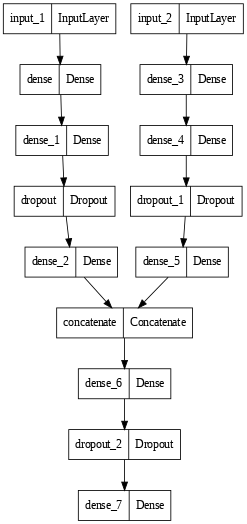

In [ ]:
utils.plot_model(model_01, dpi=60)

In [ ]:
model_01.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 2048)         24576       ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 1000)         1001000     ['input_2[0][0]']                
                                                                                              

Epoch 1/20
900/900 [==============================] - 17s 7ms/step - loss: 0.5357 - F1Score: 0.7911 - val_loss: 0.2330 - val_F1Score: 0.9515
Epoch 2/20
900/900 [==============================] - 6s 6ms/step - loss: 0.2866 - F1Score: 0.9316 - val_loss: 0.2080 - val_F1Score: 0.9515
Epoch 3/20
900/900 [==============================] - 7s 7ms/step - loss: 0.2669 - F1Score: 0.9316 - val_loss: 0.1987 - val_F1Score: 0.9515
Epoch 4/20
900/900 [==============================] - 5s 6ms/step - loss: 0.2572 - F1Score: 0.9316 - val_loss: 0.1920 - val_F1Score: 0.9515
Epoch 5/20
900/900 [==============================] - 6s 6ms/step - loss: 0.2489 - F1Score: 0.9316 - val_loss: 0.1887 - val_F1Score: 0.9515
Epoch 6/20
900/900 [==============================] - 9s 10ms/step - loss: 0.2436 - F1Score: 0.9316 - val_loss: 0.1891 - val_F1Score: 0.9515
Epoch 7/20
900/900 [==============================] - 7s 8ms/step - loss: 0.2386 - F1Score: 0.9316 - val_loss: 0.1837 - val_F1Score: 0.9515
Epoch 8/20
900/900

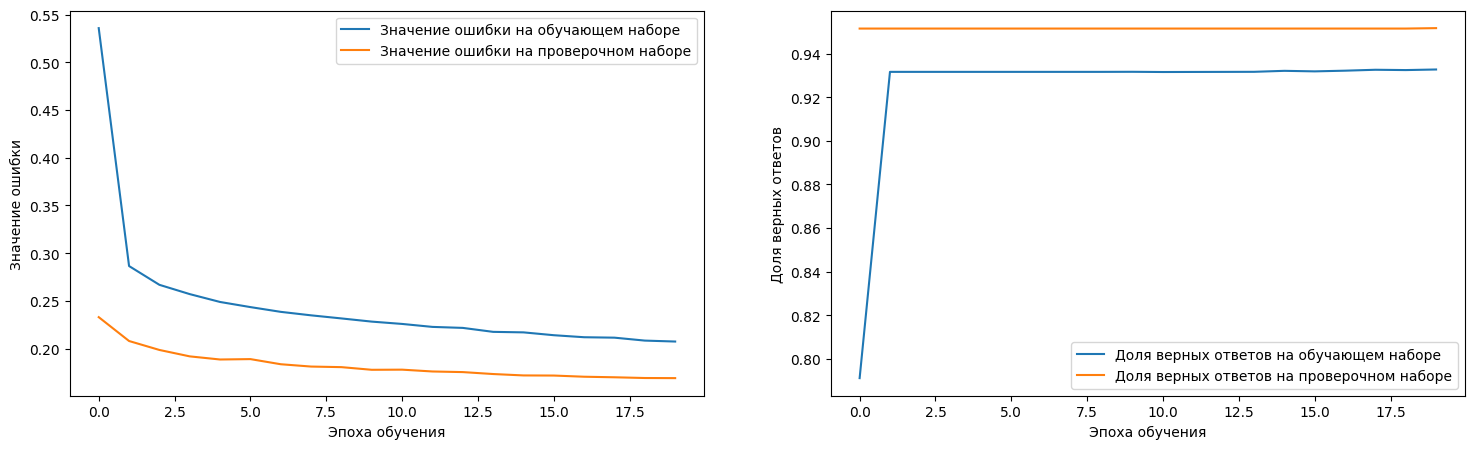

In [ ]:
model_01.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=[custum_metric])

history = model_01.fit([x_train_age_01, x_train_prof_01],
                           y_train_01,
                           shuffle=True,
                           batch_size=16,
                           epochs=20,
                           validation_split=0.25,
                           verbose=1)

# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['F1Score'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_F1Score'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Модель нейросети, предложенная ChatGPT

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Параметризация и токенизация с использованием One Hot Encoding
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df_guid['ЗаключениеМК'])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, df_guid['ЗаключениеМК'], test_size=0.2)

# Создание модели нейросети
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(df_guid['ЗаключениеМК'].unique()), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from sklearn.preprocessing import LabelEncoder

# Создание экземпляра LabelEncoder
encoder = LabelEncoder()

# Преобразование строковых меток в числовые значения
y_train_encoded = encoder.fit_transform(y_train)

# Обучение модели с преобразованными данными
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
480/480 [==============================] - 4s 5ms/step - loss: 0.0823 - accuracy: 0.9795
Epoch 2/10
480/480 [==============================] - 3s 6ms/step - loss: 9.2390e-04 - accuracy: 1.0000
Epoch 3/10
480/480 [==============================] - 2s 5ms/step - loss: 1.8276e-04 - accuracy: 1.0000
Epoch 4/10
480/480 [==============================] - 2s 4ms/step - loss: 7.2212e-05 - accuracy: 1.0000
Epoch 5/10
480/480 [==============================] - 2s 4ms/step - loss: 3.5386e-05 - accuracy: 1.0000
Epoch 6/10
480/480 [==============================] - 4s 7ms/step - loss: 1.9625e-05 - accuracy: 1.0000
Epoch 7/10
480/480 [==============================] - 5s 11ms/step - loss: 1.1792e-05 - accuracy: 1.0000
Epoch 8/10
480/480 [==============================] - 5s 10ms/step - loss: 7.5176e-06 - accuracy: 1.0000
Epoch 9/10
480/480 [==============================] - 5s 9ms/step - loss: 4.9894e-06 - accuracy: 1.0000
Epoch 10/10
480/480 [==============================] - 4s 8ms/step

# Выводы:


Модель, предложенная ChatGPT, оказалась слишком примитивной, результат угадывается.
Нейросеть на 2 входа требует доработки (не понятны причины результата на втором графике), однако, учитывая разбалансироавнность датасета, дальнейшая работа с ним интересна исключительно в образовательном плане.
По поводу текстовых комментариев результата предсказания - теоретических знаний у меня оказалось недостаточно, буду изучать теорию дальше.